In [1]:
#Some imports:
#%pip install numpy
#%pip install scipy
#%pip install matplotlib
import sys
import numpy as np
from collections import defaultdict

from data import Data
from regime_model import RegimeModel
from multinomial_dirichlet import MultinomialDirichlet
from normal_normal_inverse_gamma import NormalNIG
from normal_linear_model import NormalLinearModel
from uniform_pareto import UniformPareto
from probability_model import ProbabilityModel
from poisson_gamma import PoissonGamma
from exponential_gamma import ExponentialGamma
from simulate_changepoint_data import *
import matplotlib.pyplot as plt

In [8]:
n=1000
lambda_cps=.01
seed=1
probability_models=[]
probability_models.append(MultinomialDirichlet(k=np.array([3,5],dtype=int),alpha=1))
probability_models.append(NormalNIG(p=3,alpha_beta=[1,.1],v=1))
probability_models.append(NormalLinearModel(p=4,alpha_beta=[1,.1],v=1))
tau,regimes,inclusion_vectors,xys=simulate(n,probability_models,seed=seed,lambda_cps=lambda_cps)

In [9]:
# show the sizes of the x (time points) and y (data values) matrices generated for each probability model
for _ in range(len(xys)):
    x,y=xys[_]
    print(x.shape,y.shape)

(1000,) (2, 1000)
(1000,) (3, 1000)
(1000,) (4, 1000)


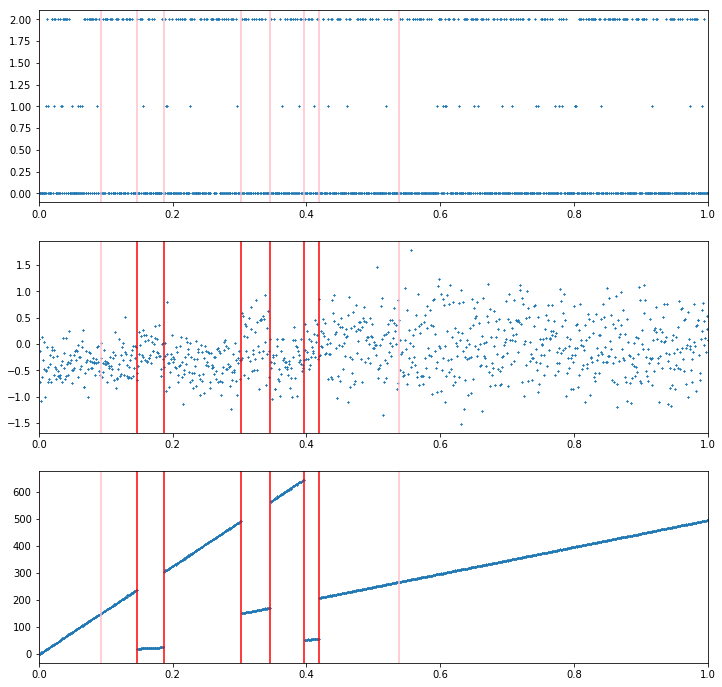

In [10]:
plt.figure(figsize=(12,4*len(probability_models)))
for pm_index in range(len(probability_models)):
    plt.subplot(len(probability_models), 1, pm_index+1)
    plt.autoscale(enable=True, axis='x', tight=True)
    x,y=xys[pm_index]
    r=regimes[0]
    for i in range(len(tau)):
        new_r=regimes[i+1]
        if inclusion_vectors[pm_index,new_r] and new_r!=r:
            plt.axvline(x=tau[i],color='red')
            r=new_r
        else:
            plt.axvline(x=tau[i],color='pink')

    plt.scatter(x,y[0,],marker="x",s=1.5)
plt.show()